## Plotting DEGs for Longitudinal converters

In [1]:

# load libraries
quiet_library <- function(...) {
    suppressPackageStartupMessages(library(...))
}
quiet_library(tidyverse)
quiet_library(Seurat)
quiet_library(ggplot2)
quiet_library(Matrix)
quiet_library(dplyr)
quiet_library(viridis)
quiet_library(harmony)
quiet_library(future)
quiet_library(future.apply)
quiet_library(SingleCellExperiment)
quiet_library(SeuratDisk)
quiet_library(ggpubr)
quiet_library(knitr)
quiet_library(plotly)
quiet_library(ggsci)
quiet_library(aplot)
quiet_library(cowplot)
options(warn = -1)


In [2]:
# Check number of cores
future::availableCores()
# Set up parallel processing to run when using 'future' functions 
future::plan(strategy = "multicore", workers = future::availableCores()-5)  
options(future.globals.maxSize = 1000 * 1024^3)
# to turn off parallel processing run line below
# future::plan(strategy = "sequential")

system 
    64

In [3]:
# define the color palette to be used
npg_color <- c("#E64B35FF", "#4DBBD5FF", "#00A087FF", "#3C5488FF", "#F39B7FFF", 
               "#8491B4FF", "#91D1C2FF", "#DC0000FF", "#7E6148FF", "#B09C85FF")
nejm_color <- c("#BC3C29FF", "#0072B5FF", "#E18727FF", "#20854EFF", "#7876B1FF", "#6F99ADFF", "#FFDC91FF", "#EE4C97FF")
jama_color <- c("#374E55FF", "#DF8F44FF", "#00A1D5FF", "#B24745FF", "#79AF97FF", "#6A6599FF", "#80796BFF")
jco_color <- c("#0073C2FF", "#EFC000FF", "#868686FF", "#CD534CFF", "#7AA6DCFF", "#003C67FF", "#8F7700FF")
cluster_colors <- c("#DC050C", "#FB8072", "#1965B0", "#7BAFDE", "#882E72", "#B17BA6", "#FF7F00", "#FDB462", "#E7298A", 
    "#E78AC3", "#33A02C", "#B2DF8A", "#55A1B1", "#8DD3C7", "#A6761D", "#E6AB02", "#7570B3", "#BEAED4", "#666666", "#999999", 
    "#aa8282", "#d4b7b7", "#8600bf", "#ba5ce3", "#808000", "#aeae5c", "#1e90ff", "#00bfff", "#56ff0d", "#ffff00")

cluster_colors_ext <- colorRampPalette(cluster_colors)(75)
options(repr.plot.width = 20, repr.plot.height = 15)

In [4]:
# reading the IH celltype color coding file 
IH_colors_df=read.csv("/home/jupyter/ALTRA_ANALYSIS/Deep_clean/Figure_notebooks/files/input_files/Color_Annotation_and_Order_FINAL 1.csv")
IH_colors_df%>%head(3)
IH_colors_df%>%dim

,xpos,label,color
,<int>,<chr>,<chr>
1,1,SOX4+ naive CD4 T cell,#2B5777
2,2,Core naive CD4 T cell,#597FC6
3,3,ISG+ naive CD4 T cell,#072E77


[1] 71  3

In [5]:
#loading aim 3 deg results file
degs_a3=read.csv("/home/jupyter/ALTRA_ANALYSIS/Deep_clean/Figure_notebooks/files/input_files/certpro_Zi_files/ALTRA_AIM3_certpro_scRNA_Pseudobulk_AIFI_l3_mixed_models_time_result_750days.csv")
degs_a3%>%head(3)

,celltype,effect,group,term,estimate,std.error,statistic,df,p.value,gene,q_values,sig
,<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
1,Adaptive NK cell,fixed,NA,days_to_conversion,-4.601178e-04,0.0001726325,-2.6653027,43.00000,0.01079008,AAK1,0.3471929,ns
2,Adaptive NK cell,fixed,NA,days_to_conversion,2.698218e-04,0.0001816877,1.4850857,43.00000,0.14481591,AASDHPPT,0.5004335,ns
3,Adaptive NK cell,fixed,NA,days_to_conversion,-1.742457e-05,0.0001246150,-0.1398272,42.98683,0.88944965,AATF,0.7853112,ns


In [6]:
degs_a3%>%group_by(celltype)%>%summarise(counts=n())

celltype,counts
<chr>,<int>
Adaptive NK cell,3528
Adaptive NK cell_uk1_T,2008
C1Q+ CD16 monocyte,4238
CD14+ cDC2,6757
CD27+ effector B cell,4302
CD27- effector B cell,2354
CD4 MAIT,2183
CD56bright NK cell,5093
CD8 MAIT,6163


In [7]:
##adding the direction column

degs_a3=degs_a3%>%
    filter(!is.na(p.value) & !is.na(estimate)) %>% mutate(direction=if_else(estimate>0, 'positive', 'negative'))
degs_a3 %>% head()

,celltype,effect,group,term,estimate,std.error,statistic,df,p.value,gene,q_values,sig,direction
,<chr>,<chr>,<lgl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,Adaptive NK cell,fixed,NA,days_to_conversion,-4.601178e-04,0.0001726325,-2.6653027,43.00000,0.01079008,AAK1,0.3471929,ns,negative
2,Adaptive NK cell,fixed,NA,days_to_conversion,2.698218e-04,0.0001816877,1.4850857,43.00000,0.14481591,AASDHPPT,0.5004335,ns,positive
3,Adaptive NK cell,fixed,NA,days_to_conversion,-1.742457e-05,0.0001246150,-0.1398272,42.98683,0.88944965,AATF,0.7853112,ns,negative
4,Adaptive NK cell,fixed,NA,days_to_conversion,-1.164469e-04,0.0001820954,-0.6394831,41.24902,0.52604448,ABCB1,0.7095864,ns,negative
5,Adaptive NK cell,fixed,NA,days_to_conversion,-2.050641e-04,0.0002058161,-0.9963461,43.00000,0.32465598,ABCE1,0.6228828,ns,negative
6,Adaptive NK cell,fixed,NA,days_to_conversion,-3.740837e-06,0.0001426124,-0.0262308,43.00000,0.97919461,ABCF1,0.7952158,ns,negative


In [8]:
# plot degs counts
# calculate the deg counts per cell types
deg_counts_a3 <- degs_a3 %>% 
    dplyr::filter(q_values<0.1) %>% 
    group_by(celltype, direction) %>% summarise(deg_counts_a3=n()) %>%
    mutate(deg_counts_a3=if_else(direction=='positive', deg_counts_a3, -deg_counts_a3),
          enriched=if_else(direction=='positive', 'increase with time to conversion','Decrease'))
deg_counts_a3 %>%head(4)

`summarise()` has grouped output by 'celltype'. You can override using the
`.groups` argument.


celltype,direction,deg_counts_a3,enriched
<chr>,<chr>,<int>,<chr>
CD27+ effector B cell,negative,-1,Decrease
CD27+ effector B cell,positive,3,increase with time to conversion
CM CD4 T cell,negative,-1418,Decrease
CM CD4 T cell,positive,1294,increase with time to conversion


In [9]:
# ordering the celltypes based on IH order for plotting 
deg_counts_a3 <- deg_counts_a3 %>% rename(count = deg_counts_a3)
deg_counts_a3 <- deg_counts_a3 %>% rename(Expression = direction)

In [10]:
orders3<-deg_counts_a3
orders3$count<-abs(orders3$count)
orders3<-orders3%>%
  group_by(celltype) %>%
  summarize(value = sum(count))%>%arrange(desc(value)) %>% select (celltype) %>% pull()
 
# Load predetermined list from CSV file
predetermined_list <- read.csv("/home/jupyter/ALTRA_ANALYSIS/Deep_clean/Immune_Cell_Order_forDEGsummary - Sheet1.csv")
 
 
#Label CD8aa T cell in pre-determined list at CD8aa
predetermined_list$FINAL.ORDER <- gsub("CD8aa T cell", "CD8aa", predetermined_list$FINAL.ORDER)
predetermined_list$FINAL.ORDER <- gsub("Core naive CD8 T cell ", "Core naive CD8 T cell", predetermined_list$FINAL.ORDER)
 
# Create a vector of unique values of FINAL.ORDER
order_values <- unique(predetermined_list$FINAL.ORDER)
 
# Create a vector of unique values of Expression
expression_values <- unique(deg_counts_a3$Expression)
 
# Generate all unique combinations of FINAL.ORDER and Expression
combinations <- expand.grid(FINAL.ORDER = order_values,
                             Expression = expression_values)
 
# Ordering the combinations by FINAL.ORDER when grouped with Expression
ordered_combinations <- combinations[order(combinations$FINAL.ORDER, combinations$Expression), ]
 
ordered_combinations <- ordered_combinations %>% rename(celltype = FINAL.ORDER)
 
# Merge the dataframes based on "celltype" and "Expression"
merged_df<- merge(ordered_combinations, deg_counts_a3, by = c("celltype", "Expression"), all.x = TRUE)
 
merged_df$count <- ifelse(is.na(merged_df$count), 0, merged_df$count)
 


In [11]:
merged_df%>%head(3)

,celltype,Expression,count,enriched
,<fct>,<fct>,<dbl>,<chr>
1,SOX4+ naive CD4 T cell,negative,0,NA
2,SOX4+ naive CD4 T cell,positive,0,NA
3,Core naive CD4 T cell,negative,-1368,Decrease


In [12]:
# making IH_colors as a vector for giving colors to the plot 
IH_colors <- setNames(IH_colors_df$color,IH_colors_df$label)
IH_colors

SOX4+ naive CD4 T cell                Core naive CD4 T cell 
                           "#2B5777"                            "#597FC6" 
               ISG+ naive CD4 T cell                        CM CD4 T cell 
                           "#072E77"                            "#6793A4" 
           GZMB- CD27+ EM CD4 T cell            GZMB- CD27- EM CD4 T cell 
                           "#406B9C"                            "#233C5B" 
              ISG+ memory CD4 T cell KLRF1- GZMB+ CD27- memory CD4 T cell 
                           "#5480A3"                            "#628088" 
                      Naive CD4 Treg                      Memory CD4 Treg 
                           "#8EB5D7"                            "#001A9A" 
              KLRB1+ memory CD4 Treg                GZMK+ memory CD4 Treg 
                           "#3B76C1"                            "#A3B7C2" 
                     Memory CD8 Treg               KLRB1+ memory CD8 Treg 
                           "#C3D1DA"                            "#C7E0C6" 
                           DN T cell                 Proliferating T cell 
                           "#656E68"                            "#AEAEB0" 
              SOX4+ naive CD8 T cell                Core naive CD8 T cell 
                           "#465F32"                            "#63A686" 
               ISG+ naive CD8 T cell                        CM CD8 T cell 
                           "#869A94"                            "#6D9F5E" 
           GZMK+ CD27+ EM CD8 T cell     KLRF1- GZMB+ CD27- EM CD8 T cell 
                           "#95BDA1"                            "#59895F" 
           GZMK- CD27+ EM CD8 T cell     KLRF1+ GZMB+ CD27- EM CD8 T cell 
                           "#314937"                            "#4E695B" 
              ISG+ memory CD8 T cell                                CD8aa 
                           "#94C0AD"                            "#7ECDAD" 
                       SOX4+ Vd1 gdT                        Naive Vd1 gdT 
                           "#B6D7C8"                            "#537E41" 
             KLRF1- effector Vd1 gdT              KLRF1+ effector Vd1 gdT 
                           "#A39E78"                            "#7CB38E" 
                       GZMK+ Vd2 gdT                        GZMB+ Vd2 gdT 
                           "#72AF5A"                            "#AECFB1" 
                            CD8 MAIT                             CD4 MAIT 
                           "#1E8F64"                            "#6F723F" 
                           ISG+ MAIT                  Transitional B cell 
                           "#BBB788"                            "#9C6469" 
                   Core naive B cell                    ISG+ naive B cell 
                           "#D5ABAB"                            "#D9A996" 
                 Early memory B cell                   Core memory B cell 
                           "#362027"                            "#B16B72" 
             Activated memory B cell       Type 2 polarized memory B cell 
                           "#60545A"                            "#4E2927" 
                  CD95 memory B cell                CD27+ effector B cell 
                           "#EBC3A7"                            "#F4CEC3" 
               CD27- effector B cell                          Plasma cell 
                           "#A3787B"                            "#784D47" 
                  CD56bright NK cell                GZMK+ CD56dim NK cell 
                           "#FF7F55"                            "#A31001" 
               GZMK- CD56dim NK cell                     Adaptive NK cell 
                           "#E16040"                            "#781B15" 
                ISG+ CD56dim NK cell                Proliferating NK cell 
                           "#EEA172"                            "#CC3B18" 
                  Core CD14 monocyte                   ISG+ CD14 monocyte 
                           "#F6831B"   

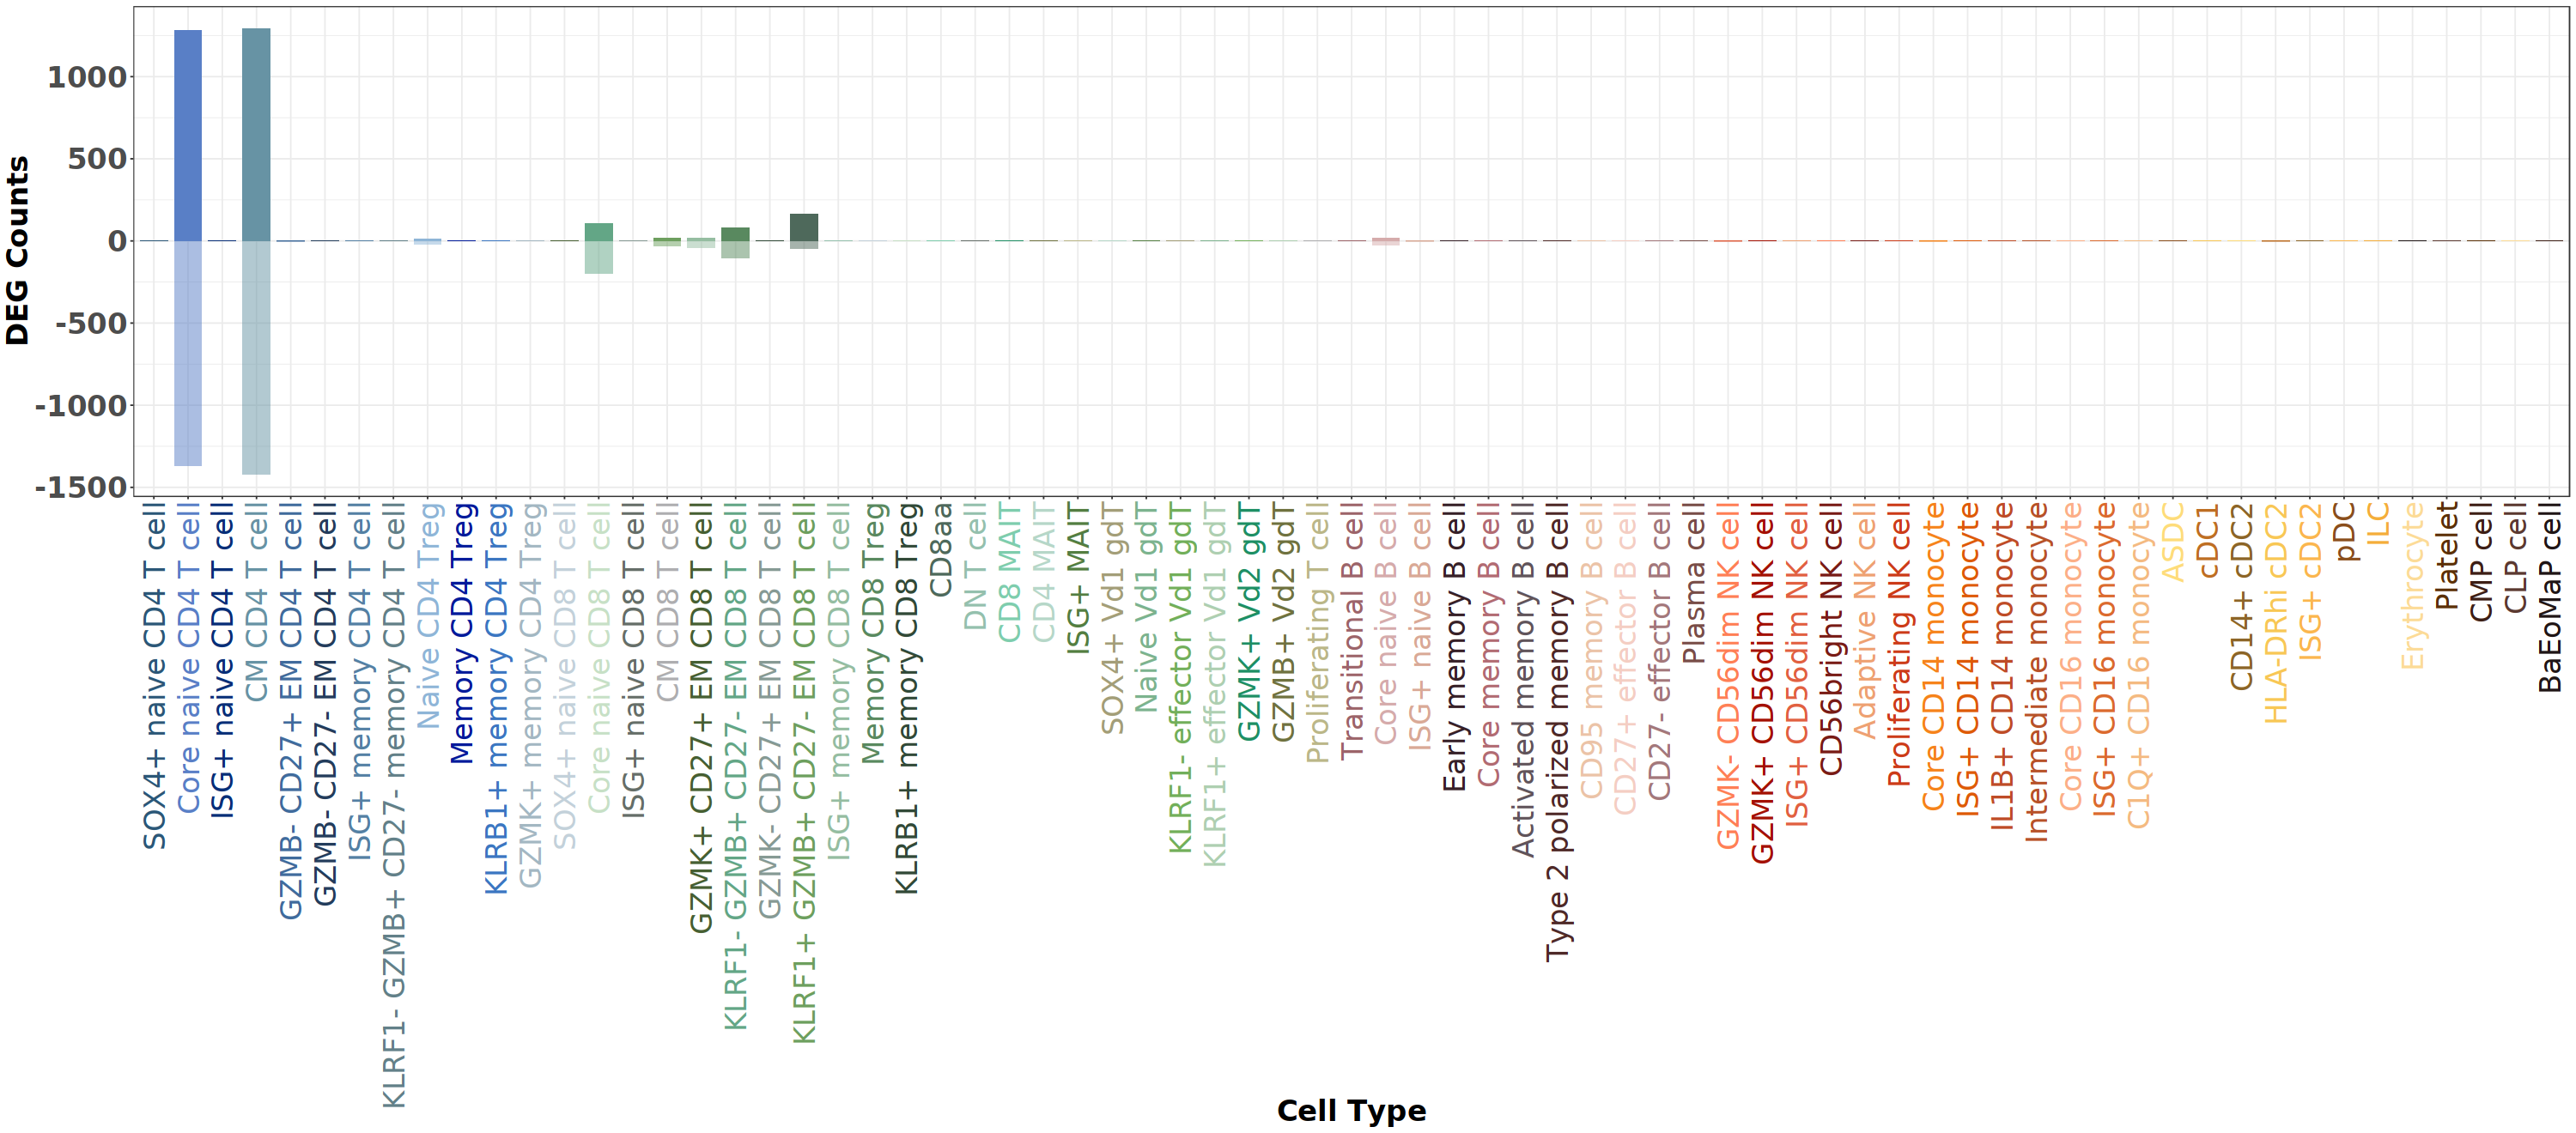

In [13]:
options(repr.plot.width = 25, repr.plot.height = 11)

p1 <- ggplot(merged_df, aes(x = celltype, y = count, fill = celltype)) +
  geom_bar(stat = "identity", width = 0.8, aes(alpha = Expression)) + 
  scale_fill_manual(values = IH_colors) +
  labs(y = "DEG Counts", x = "Cell Type") +
  scale_alpha_manual(values = c(0.5, 1)) +
  theme_bw(base_size = 8.5) +
  # facet_grid(contrast ~ .) +  # Uncomment this line if you want to use facet_grid
  theme(legend.position = "none",
        axis.text.x = element_text(size = 20,angle = 90, vjust = 0.5, hjust = 1, color = IH_colors),
        axis.text.y = element_text(size = 20, face = "bold"),
        axis.title.y = element_text(size = 20, face = "bold"),
        axis.title.x = element_text(size = 20, face = "bold"))

p1

In [14]:
# Saving the figure
ggsave("/home/jupyter//ALTRA_ANALYSIS/Deep_clean/Figure_files/Certpro_figures/Plots_for_manuscript/Fig_2D deg_bar_plot_q<0_1.pdf", p1, width = 25, height = 11)

In [15]:
sessionInfo()

R version 4.3.1 (2023-06-16)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 20.04.6 LTS

Matrix products: default
BLAS/LAPACK: /home/jupyter/libs/r_scrna/lib/libopenblasp-r0.3.24.so;  LAPACK version 3.11.0

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

time zone: Etc/UTC
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] cowplot_1.1.3               aplot_0.2.3                
 [3] ggsci_3.2.0                 plotly_4.10.4              
 [5] knitr_1.47                  ggpubr_0.6.0               
 [7] SeuratDisk_0.0.0.9021       SingleCellExperiment_1.22.0
 [9] SummarizedExperiment_1.30.2 Biobas